<a href="https://colab.research.google.com/github/Ruborcalor/CNN_NMIST/blob/master/Kaggle_Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#imports

import pandas as pd
import numpy as np

In [0]:
# setup for kaggle api. Must upload kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
# download kaggle competitions datasets
!kaggle competitions download -c mais202-fall2019

100% 20.7M/20.7M [00:00<00:00, 24.8MB/s]

  0% 0.00/127 [00:00<?, ?B/s]
100% 127/127 [00:00<00:00, 125kB/s]
  0% 0.00/429k [00:00<?, ?B/s]
100% 429k/429k [00:00<00:00, 131MB/s]
 79% 41.0M/51.7M [00:00<00:00, 52.9MB/s]
100% 51.7M/51.7M [00:00<00:00, 88.1MB/s]
  0% 0.00/165k [00:00<?, ?B/s]
100% 165k/165k [00:00<00:00, 54.3MB/s]


In [5]:
# unzip kaggle datasets
!unzip /content/train_images.npy.zip
!unzip /content/test_images.npy.zip

Archive:  /content/train_images.npy.zip
  inflating: train_images.npy        
Archive:  /content/test_images.npy.zip
  inflating: test_images.npy         


In [6]:
# load training data into memory and randomly allocate 10% of it to a validation
train_images = np.load("train_images.npy")
test_images = np.load("test_images.npy")

train_labels = np.loadtxt(open("train_labels.csv", "rb"), delimiter=",", skiprows=1)
train_labels = train_labels[:, 1]

# normalize the images
train_images, test_images = train_images / 255.0, test_images / 255.0

train_images = train_images.reshape(*train_images.shape, 1)
test_images = test_images.reshape(*test_images.shape, 1)

from sklearn.model_selection import train_test_split
train_images, valid_images, train_labels, valid_labels = train_test_split(train_images, train_labels, test_size=0.1, random_state=12345)

print(train_images.shape)
print(valid_images.shape)
print(train_labels.shape)
print(valid_labels.shape)

(45000, 28, 28, 1)
(5000, 28, 28, 1)
(45000,)
(5000,)


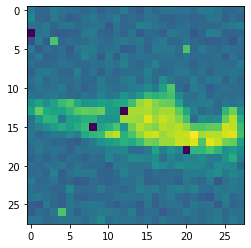

In [7]:
# from slack. For visualizing an image from the dataset

import matplotlib.pyplot as plt

def show_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    plt.show()

show_image(train_images[3]) # 0 is the index of the training image you want to display

In [8]:
# import tensorflow

from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

TensorFlow 2.x selected.


In [52]:
# define keras model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu',padding='same',input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# display model summary and compile it
model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_53 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
batch_normalization_12 (Batc (None, 12, 12, 64)        256       
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 6, 6, 64)        

In [53]:
model.fit(train_images, train_labels,  epochs=25, validation_data=(valid_images, valid_labels))

Train on 45000 samples, validate on 5000 samples
Epoch 1/25
45000/45000 [==============================] - 17s 381us/sample - loss: 0.6127 - accuracy: 0.7730 - val_loss: 0.4274 - val_accuracy: 0.8394
Epoch 2/25
45000/45000 [==============================] - 15s 340us/sample - loss: 0.4521 - accuracy: 0.8314 - val_loss: 0.4263 - val_accuracy: 0.8562
Epoch 3/25
45000/45000 [==============================] - 15s 341us/sample - loss: 0.3975 - accuracy: 0.8515 - val_loss: 0.3563 - val_accuracy: 0.8706
Epoch 4/25
45000/45000 [==============================] - 15s 342us/sample - loss: 0.3721 - accuracy: 0.8618 - val_loss: 0.3366 - val_accuracy: 0.8752
Epoch 5/25
45000/45000 [==============================] - 15s 336us/sample - loss: 0.3500 - accuracy: 0.8690 - val_loss: 0.3392 - val_accuracy: 0.8746
Epoch 6/25
45000/45000 [==============================] - 15s 334us/sample - loss: 0.3233 - accuracy: 0.8784 - val_loss: 0.3342 - val_accuracy: 0.8766
Epoch 7/25
45000/45000 [=====================

In [55]:
# for generating submission

y_test = model.predict(test_images)
y_test = np.argmax(y_test, axis=1)
print(y_test.shape)

df_test = pd.read_csv('sample_submission.csv')
df_test['label'] = y_test
df_test.to_csv('submission.csv', index=False)

(20000,)
